In [1]:
 from georges.fermi import materials as gfmaterial
 from georges import ureg as _ureg

In [2]:
 mat_water = gfmaterial.Water
 mat_beryllium = gfmaterial.Beryllium

In [3]:
thickness_be = mat_beryllium.required_thickness(70 * _ureg.MeV, 230 * _ureg.MeV)
thickness_water = mat_water.required_thickness(70 * _ureg.MeV, 230 * _ureg.MeV)
print(thickness_be, thickness_water)

19.169800112741544 centimeter 28.84123456218398 centimeter


In [4]:
kpos_be = mat_beryllium.stopping(thickness=10*_ureg.cm, kinetic_energy=230*_ureg.MeV)
kpos_water = mat_water.stopping(thickness=20*_ureg.cm, kinetic_energy=230*_ureg.MeV)
print(kpos_be, kpos_water)


        Proton
        (.etot) Total energy: 1099.5820959394134 megaelectronvolt
        (.ekin) Kinetic energy: 161.31006593941365 megaelectronvolt
        (.momentum) Momentum: 573.3466520615538 megaelectronvolt_per_c
        (.brho): Magnetic rigidity: 1.9124787477682947 meter * tesla
        (.range): Range in water (protons only): 17.899619025917477 centimeter
        (.pv): Relativistic pv: 298.95574386317145 megaelectronvolt
        (.beta): Relativistic beta: 0.5214223241528164
        (.gamma): Relativistic gamma: 1.1719224923921197
         
        Proton
        (.etot) Total energy: 1072.1843760552133 megaelectronvolt
        (.ekin) Kinetic energy: 133.91234605521342 megaelectronvolt
        (.momentum) Momentum: 518.868898640674 megaelectronvolt_per_c
        (.brho): Magnetic rigidity: 1.7307605058129751 meter * tesla
        (.range): Range in water (protons only): 12.93917761761733 centimeter
        (.pv): Relativistic pv: 251.09947504282806 megaelectronvolt
       

In [5]:
print(mat_water.range(230*_ureg.MeV))
print(mat_water.range(70*_ureg.MeV))

32.91623456218398 centimeter
4.075 centimeter


In [6]:
degraded_kinematics = mat_water.solve_range(15 * _ureg.cm)
print(degraded_kinematics)


        Proton
        (.etot) Total energy: 1084.0923017814318 megaelectronvolt
        (.ekin) Kinetic energy: 145.82027178143207 megaelectronvolt
        (.momentum) Momentum: 543.0485397286711 megaelectronvolt_per_c
        (.brho): Magnetic rigidity: 1.8114151142303883 meter * tesla
        (.range): Range in water (protons only): 15.0167665546081 centimeter
        (.pv): Relativistic pv: 272.02639112633284 megaelectronvolt
        (.beta): Relativistic beta: 0.5009246342182382
        (.gamma): Relativistic gamma: 1.1554136403079522
        


In [7]:
print(mat_water.scattering(230 * _ureg.MeV, 10*_ureg.cm))
print(mat_beryllium.scattering(100 * _ureg.MeV, 5*_ureg.cm))

{'A': [0.00032690981376365126, 1.474621884565932e-05, 9.271589147224058e-07], 'B': 9.254532829761458e-06, 'TWISS_ALPHA': -1.5934049958996594, 'TWISS_BETA': 0.10018430230651676, 'TWISS_GAMMA': 35.3242913259056}


{'A': [0.0026487738770234934, 2.8856630025506774e-05, 7.21573336792649e-07], 'B': 3.284173424811888e-05, 'TWISS_ALPHA': -0.8786573147293412, 'TWISS_BETA': 0.02197123121882577, 'TWISS_GAMMA': 80.6526798192824}


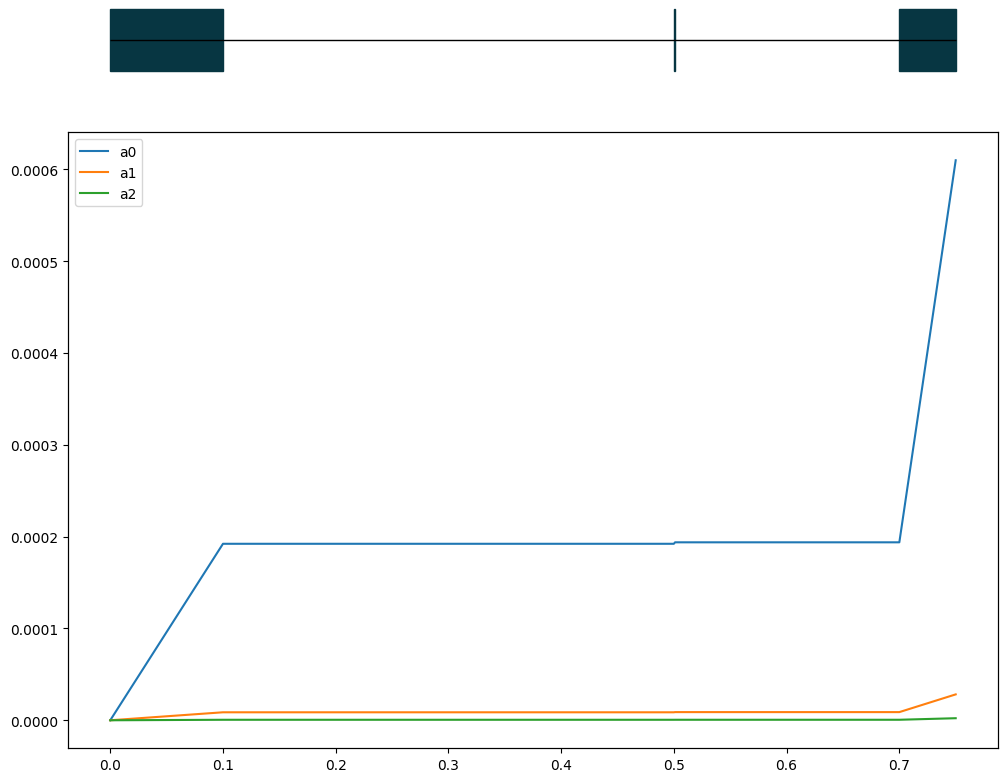

In [8]:
%matplotlib inline
import georges
from georges.fermi import materials
from georges import ureg as _ureg
from georges.manzoni.elements import Degrader

sequence = georges.PlacementSequence(name="LINE")
d1 = georges.Element.Degrader(NAME="D1",
                              L=10*_ureg.cm,
                              MATERIAL=materials.Beryllium,
                              WITH_LOSSES=True)
d2 = georges.Element.Scatterer(NAME="D2",
                               L=0.1*_ureg.cm,
                               MATERIAL=materials.Graphite)

d3 = georges.Element.Degrader(NAME="D3",
                              L=5*_ureg.cm,
                              MATERIAL=materials.Aluminum,
                              WITH_LOSSES=True)

sequence.place(d1, at_entry=0*_ureg.m)
sequence.place(d2, at_entry=0.5*_ureg.m)
sequence.place(d3, at_entry=0.7*_ureg.m)

pbs = georges.fermi.propagate(
                        sequence=sequence,
                        energy=300 *_ureg.MeV,
                        beam={
                            'A0': 0,
                            'A1': 0,
                            'A2': 0,
                        })

s = []
a0 = []
a1 = []
a2 = []
for name, k in pbs.iterrows():
    s.append(k['AT_ENTRY'].m_as('m'))
    s.append(k['AT_EXIT'].m_as('m'))
    a0.append(k['A0_IN'])
    a0.append(k['A0_OUT'])
    a1.append(k['A1_IN'])
    a1.append(k['A1_OUT'])
    a2.append(k['A2_IN'])
    a2.append(k['A2_OUT'])

artist = georges.vis.ManzoniMatplotlibArtist()
artist.plot_cartouche(beamline=sequence.df)
artist.plot(s,a0,label='a0')
artist.plot(s,a1,label='a1')
artist.plot(s,a2,label='a2')
artist.ax.legend()

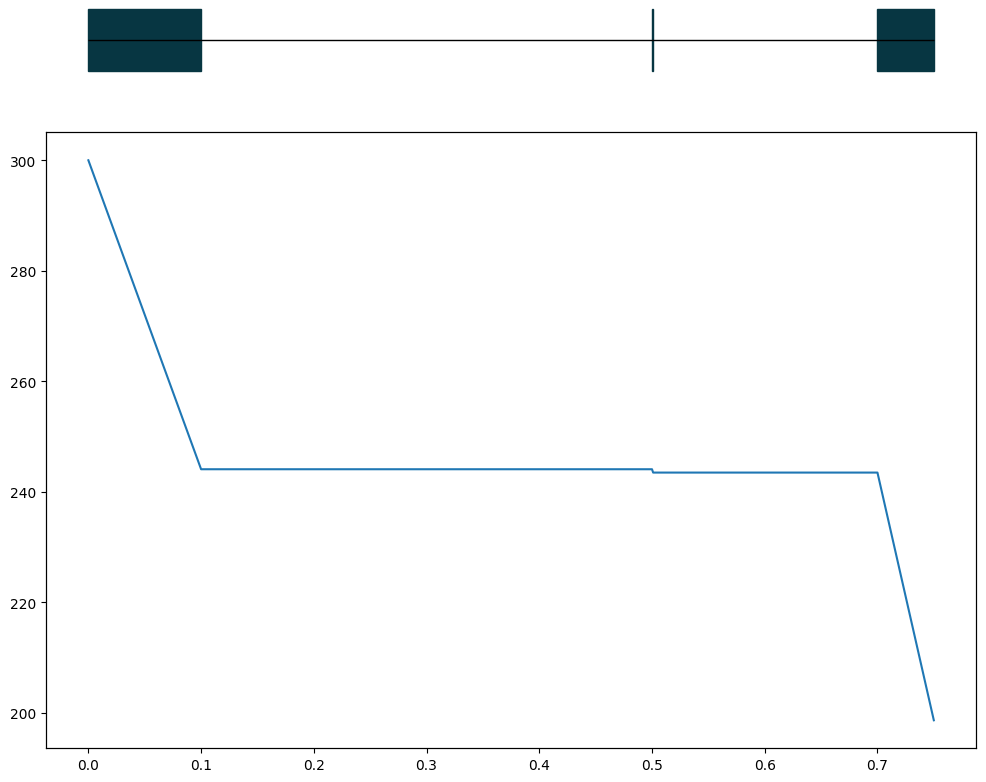

In [9]:
s = []
edep = []
for name, k in pbs.iterrows():
    s.append(k['AT_ENTRY'].m_as('m'))
    s.append(k['AT_EXIT'].m_as('m'))
    edep.append(k['ENERGY_IN'])
    edep.append(k['ENERGY_OUT'])

artist = georges.vis.ManzoniMatplotlibArtist()
artist.plot_cartouche(beamline=sequence.df)
artist.plot(s,edep)